# Module 05: Dynamic Programming

CSCI304: Analysis and Design of Algorithms<br>
Nile University<br>
Ammar Sherif<br>
Github Repo: [Analysis-and-Design-of-Algorithms-Tutorials](https://github.com/ammarSherif/Analysis-and-Design-of-Algorithms-Tutorials)

## Review
- Empirical Analysis
- Correctness Proofs and Complexity Analysis
- Graph Algorithms
- Divide-and-Conquer Paradigm 

## Outline
- [Dynamic Programming](#Dynamic-Programming)
    - [Problem](#Problem)
    - [Top-Down DP + Memoization](#Top-Down-DP-+-Memoization)
        - Theoretical Analysis
    - [Bottom-Up DP](#Bottom-Up-DP)
        - Theoretical Analysis
    - [Fibonacci Empirical Analysis](#Fibonacci-Empirical-Analysis)
- [Student Transportation Expenses](#Student-Transportation-Expenses)
    - [Solution Steps](#Solution-Steps)
    - [Recursive Solution](#Recursive-Solution)
        - [Forward Approach](#Recursive-case-1)
        - [Backward Approach](#Recursive-case-2)
        - [Mid-Point Approach](#Recursive-case-3)
        - Implementation
        - [Theoretical Analysis](#Recursive-Theoretical-Analysis)
        - [Empirical Analysis](#Recursive-Empirical-Analysis)
    - [Dynamic Programming Solution](#Dynamic-Programming-Solution)
        - [Top-Down DP](#Top-Down)
        - [Bottom-Up DP](#Bottom-Up)
    - [Empirical Analysis](#Empirical-Analysis)
- [References and Further Readings](#References-and-Further-Readings)

## Dynamic Programming
Regardless of its name, the idea behind *Dynamic Programming (DP)* is pretty simple and emerging from the Divide and Conquer paradigm, and it is used efficiently in many **optimization problems**. As we mentioned in the previous lab, the Divide and Conquer tries to split the main problem into **smaller sub-problems** of the same type. Therefore, we mentioned a common properties of the problems that could be solved using Divide and Conquer:
- The problem could be divided into smaller problems of the *same type*
- We can solve these smaller problems at a particular level; otherwise, we would divide forever.
- Given the solution of these smaller problems, we could combine them to provide the solution of the bigger problem

### Problem
Sometimes, when using recursion, a particular subproblems might be solved more than once. (With blind recursion, repeated work costs a lot of time.) To illustrate this, we use the problem of computing the Fibonacci Numbers in Lab 02.
#### Fibonacci Numbers
We are required to design an algorithm to compute the $n^{th}$ fibonacci number. It is defined as follows:

$$
F_n = 
\begin{cases}
0, & n=0\\
1, & n=1\\
F_{n-1} + F_{n-2}, & n \geq 2
\end{cases}
$$
The solution is as follows:

In [1]:
def fibonacci(n):
    """
    computes the nth fibonacci number
    ============================================================================
    Inputs:
    - n: represnts the index of the nth value in the sequence
    ----------------------------------------------------------------------------
    Outputs 
    - the value of the nth fibonacci number
    ============================================================================
    """
    # --------------------------------------------------------------------------
    # Base cases
    # --------------------------------------------------------------------------
    if n == 0:
        return 0
    elif n == 1:
        return 1
    # --------------------------------------------------------------------------
    # Recursive case
    # --------------------------------------------------------------------------
    else:
        return fibonacci(n-1) + fibonacci(n-2)

In [ ]:
# ==============================================================================
# Try some inputs while  increasing the value, and notice  how much it  takes to
# compute the value [1, 10, 15, 20, 25, 30, 35, 40, 45?]
# ==============================================================================
fibonacci(40)
# ==============================================================================
# What is the 100th fibonacci?
# ==============================================================================

#### Theoretical Analysis
First, we analyze the original complexity of the pure recursive aproach:
\begin{align*}
T(n) &= T(n-1) + T(n-2) + \Theta(1)\\
     &\geq 2T(n-2) + \Theta(1)\\
     &= \Omega(2^{n/2})\\
\end{align*}

If we are expanding our recurrence relation, required, to compute $F_n$, as in the below figure, we notice lots of repeated work.
<center><img src="./images/fib_recursion.svg" width="50%"></center>

Therefore, Dynamic Programming aims to compute this "**repeated work**" only once. The convenient problems for DP are those that have the **optimal substructure** property&mdash;that is, optimal, solutions to a problem includes optimal solutions to sub-problems. In that case, DP solves the problem through two different approaches in Dynamic Programming:

- Top-Down approach + Memoization
- Bottom-Up

### Top-Down DP + Memoization
This approach has an intuitive solution to the problem by using **recursion**, but along with storing the solutions of each sub-problem; therefore, it would only be computed at the first time&mdash;and stored in some structure; any further call to the same sub-problem would be simply retrieved from our stored solutions. This technique is called **Memoization**, storing the solutions of the sub-problems for **future use**.

#### Steps for Top-Down DP from Recursion
Given you have have a recursive approach, it is kind of straigtforward to modify it to **Top Down DP** approach. Just follow the below steps:

1. Add a new argument to the recursion, `memo`<br>it should be shared accross all the calls, so you need to initialize it once and pass it to each recursion
2. Before anything in the previous recursion, add a **condition to check whether the problem is already solved in `memo`** or not; if yes, return the value directly.
3. Before every single `return` statement, store the value in `memo` before the return.

After these steps, you will have a memoized top down DP function that solves the algorithm.

---
We do these steps below:

In [2]:
# ==============================================================================
# Step 1: add the memo as an argument
# ==============================================================================
def fibonacci_top_down(n, memo = None):
    """
    computes the nth fibonacci number using Top-Down approach with a memo
    ============================================================================
    Inputs:
    -    n: represnts the index of the nth value in the sequence
    - memo: holds the solutions to the already solved sub-problems
    ----------------------------------------------------------------------------
    Outputs: 
    - the value of the nth fibonacci number
    ============================================================================
    """
    # --------------------------------------------------------------------------
    # If the memo is not initialized, initialize it first to be a dictionary
    # --------------------------------------------------------------------------
    if memo is None:
        memo = {}
    # --------------------------------------------------------------------------
    # Step 2: check whether the problem is already solved.
    # This sub-problem has already been solved; return the solution
    # --------------------------------------------------------------------------
    if n in memo:
        return memo[n]
    
    # --------------------------------------------------------------------------
    # Otherwise, solve the sub-problem and store it.
    # --------------------------------------------------------------------------
    elif n == 0:
        # ----------------------------------------------------------------------
        # Step 3: store the value in the  memo before every single return state-
        #         ment
        # ----------------------------------------------------------------------
        memo[0] = 0
        return 0
    elif n == 1:
        # ----------------------------------------------------------------------
        # Step 3: store the value in the  memo before every single return state-
        #         ment
        # ----------------------------------------------------------------------
        memo[1] = 1
        return 1
    else:
        # ----------------------------------------------------------------------
        # Step 3: store the value in the  memo before every single return state-
        #         ment
        # ----------------------------------------------------------------------
        memo[n] = fibonacci_top_down(n-1,memo) + fibonacci_top_down(n-2,memo)
        return memo[n]

In [ ]:
fibonacci_top_down(40)

#### Theoretical Analysis
As we see, using the top-down approach is the same as the recursive approach; nevertheless using a *memo* enhances the performance with a cost of some storage. We notice that using this approach **solves each sub problem only once**. Therefore, we know the complexity of this approach is
\begin{align*}
    T_{TDown}(n) &= \boxed{\Theta\big( \text{#distinct sub-problems}\big) \times \Theta\big(\text{work per each sub-problem, single call, without recursion} \big)}\\
    &= \Theta(n) \times \Theta(1)\\
    &= \boxed{\Theta(n)}
\end{align*}

Nevertheless, in DP, we used extra storage to achieve this enhancement in performacne; that is $\Theta(n)$. In general, the **space complexity** in Dynamic Programming is $$\Theta\big(\text{#distinct sub-problems}\big)$$

### Bottom-Up DP
We notice that, to compute $F_n$, we must first compute $F_k \ \forall k < n$ . Therefore, in the Bottom-Up approach, we solve the problems _only **after**_ we solve all the **required sub-problems**. In other words, we solve the sub-problems after doing a topological sort based on the sub-problem dependency. This approach has a **better** practical performance than the Top-Down approach because it **eliminates** the recursion. To illustrate it, we go back to our problem:

- To compute $F_n$, we need to compute $F_{n-1}$ and $F_{n-2}$
- To compute $F_{n-1}$, we need to compute $F_{n-2}$ and $F_{n-3}$
- This continues until we reach
- To compute $F_{2}$, we need to compute $F_{1}$ and $F_{0}$
- $F_1 = 1$ and $F_0 = 0$

Therefore, we solve from bottom-up; that is to solve the basic primitive sub-problems that has no dependency first. Then, we proceed towards more complex problems. In our case, Fibonacci, we can easily compute $$F_2 \implies F_3 \implies \cdots \implies F_n$$

Notice, in general, we also use a space to store the solutions of each sub-problem to be easily retrieved when needed.

#### Steps for DP Bottom-Up

1. Sort the sub-problems based on their dependency
    - You can do this analytically like what we have done above
    - Sometimes, you might do it empirically; we give an example below
2. Within the DP Bottom-Up function create a memo, and initialize the base case values
3. Create a loop that loops according to the sorted dependency
4. Just write down the recursive equation using values in `memo` instead of recursive calls
    1. Copy the code of the recursive case and paste it into the loop
    2. Change every recursive call to an access of memo: like `memo[k]` instead of `call(k)`
    3. Change the return statement to be an assignment of `memo[i]` where `i` is the loop variable


##### Steps for empirical investigation of task dependency
- Within the top-down DP function, print the problem being solved when not solved in memo

Check below

In [3]:
# ==============================================================================
# Here, we investigate the task dependencies
# ==============================================================================
def fibonacci_task_dependency(n, memo = None):
    """
    computes the nth fibonacci number using Top-Down approach with a memo  while
    printing the sequence of problems according to their dependency order
    ============================================================================
    Inputs:
    -    n: represnts the index of the nth value in the sequence
    - memo: holds the solutions to the already solved sub-problems
    ----------------------------------------------------------------------------
    Outputs: 
    - the value of the nth fibonacci number
    ============================================================================
    """
    # --------------------------------------------------------------------------
    # If the memo is not initialized, initialize it first to be a dictionary
    # --------------------------------------------------------------------------
    if memo is None:
        memo = {}
    # --------------------------------------------------------------------------
    # check whether the problem is already solved.
    # This sub-problem has already been solved; return the solution
    # --------------------------------------------------------------------------
    if n in memo:
        return memo[n]
    
    # ==========================================================================
    # This sub-problem has not been solved before, so print it to know its order
    # ==========================================================================
    print(n)

    # --------------------------------------------------------------------------
    # Otherwise, solve the sub-problem and store it.
    # --------------------------------------------------------------------------
    if n == 0:
        memo[0] = 0
        return 0
    elif n == 1:
        memo[1] = 1
        return 1
    else:
        memo[n] = fibonacci_task_dependency(n-1,memo)+ \
                  fibonacci_task_dependency(n-2,memo)
        return memo[n]

In [ ]:
v = fibonacci_task_dependency(10)

In [ ]:
v = fibonacci_task_dependency(5)

As we can see from our empirical investigation of the sub-problems. $10 \implies 9 \implies \cdots \implies 1 \implies 0$ This is the dependecy of the sub-problems, so we go bottom-up that is

$$\boxed{0 \implies 1 \implies \cdots \implies n-1 \implies n}$$

In [4]:
def fibonacci_bottom_up(n):
    """
    computes the nth fibonacci number using Bottom-Up DP approach
    ============================================================================
    Inputs:
    -    n: represnts the index of the nth value in the sequence
    ----------------------------------------------------------------------------
    Outputs: 
    - the value of the nth fibonacci number
    ============================================================================
    """
    # ==========================================================================
    # Step 2: define the memo, and initialize the base  case values; this is the
    #         same as the recursive base case
    # ==========================================================================
    # define the space to store our solutions
    # --------------------------------------------------------------------------
    memo = {}
    # --------------------------------------------------------------------------
    # start with sub-problems that has no dependencies
    # --------------------------------------------------------------------------
    memo[0] = 0
    memo[1] = 1
    
    # ==========================================================================
    # Step 3: create a loop that loops over the sub-problems after the base case
    #         according to the sub-problem dependecy in Step 1.
    # --------------------------------------------------------------------------
    # start solving more complex problems until solving the original problem
    # ==========================================================================
    for i in range(2,n+1):
        # ======================================================================
        # Step 4: write down the recurrence equation computing memo[i] using the
        #         previously computed values.
        # ----------------------------------------------------------------------
        # Our recurrence is f(i) = f(i-1) + f(i-2). Because, f(i)  is stored  in
        # memo[i], so we just write down the same equation.
        # ======================================================================
        memo[i] = memo[i-1] + memo[i-2]
    # ==========================================================================
    # return the solution to the problem the last value computed in memo
    # ==========================================================================
    return memo[n]

In [ ]:
# ==============================================================================
# Try very large values like 2000, 3000, ..., up to 100K, 500K, etc.
# ------------------------------------------------------------------------------
# Could you notice the enhancement in performance?
# ==============================================================================
fibonacci_bottom_up(2000)

#### Theoretical Analysis
Because there is no longer recursion in Bottom-Up approach, the complexity becomes easier as any iterative algorithm. In our case,
$$\boxed{T_{BUp}(n) = \Theta(n)}$$

Also, the **space complexity** is the same $$\Theta(n)$$

<div class="alert alert-block alert-info">
<b>Tip:</b> The bottom-up allow us to do further enhancement in terms of storage. We notice here that we <b>only need 3 variables</b>. I mean we do not really need the values of 0 and 1 once we computed the value of 2. We never need their values after that. Therefore, we adjust our bottom-up algorithm to use only three variables as below. Think of them as <b>pointers</b> moving through the values being computed.
</div>

In [5]:
def fibonacci_bottom_up_enhanced(n):
    """
    computes the nth fibonacci number using Bottom-Up DP approach  while enhanc-
    ing the storage
    ============================================================================
    Inputs:
    -    n: represnts the index of the nth value in the sequence
    ----------------------------------------------------------------------------
    Outputs: 
    - the value of the nth fibonacci number
    ============================================================================
    """
    # ==========================================================================
    # We no longer need a memo
    # ==========================================================================
    
    # --------------------------------------------------------------------------
    # handle the base cases
    # --------------------------------------------------------------------------
    if n == 0 or n == 1:
        return n
    # --------------------------------------------------------------------------
    # Step 2: start with sub-problems that has no dependencies
    # --------------------------------------------------------------------------
    previous_value = 0
    current_value = 1
    
    # ==========================================================================
    # Step 3: create a loop that loops over the sub-problems after the base case
    #         according to the sub-problem dependecy in Step 1.
    # --------------------------------------------------------------------------
    # start solving more complex problems until solving the original problem
    # ==========================================================================
    for i in range(2,n+1):
        # ======================================================================
        # Step 4: write down the  recurrence equation  computing  current_value,
        #         representing the f(i), while the previous represents f(i-1)
        # ----------------------------------------------------------------------
        # Hence, given that k represents the kth iteration, as time, and c(k) is
        # the value of current_value in the kth iteration, and p(k) is the value
        # of previous_value in the kth iteration
        # ----------------------------------------------------------------------
        # Our recurrence is c(k) = c(k-1) + p(k-1) and p(k) = c(k-1).
        # ======================================================================
        current_value, previous_value = current_value + previous_value, \
                                        current_value
    # ==========================================================================
    # return the solution to the problem the last value computed in memo
    # ==========================================================================
    return current_value

In [ ]:
# ==============================================================================
# Try very large values like  2000,  3000, ..., up to  100K,  500K, up to 1M and
# millions representing the vlaues being computed.  Could you  compare it to the
# normal bottom-up?
# ==============================================================================
fibonacci_bottom_up_enhanced(1000000)

### Fibonacci Empirical Analysis

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import time

In [7]:
times1 = []
times2 = []
times3 = []
times4 = []
SIZE = 10
for i in range(1,SIZE):
    start_time = time.time()
    fibonacci(i)
    times1.append(time.time() - start_time)
    start_time = time.time()
    fibonacci_top_down(i)
    times2.append(time.time() - start_time)
    start_time = time.time()
    fibonacci_bottom_up(i)
    times3.append(time.time() - start_time)
    fibonacci_bottom_up_enhanced(i)
    times4.append(time.time() - start_time )

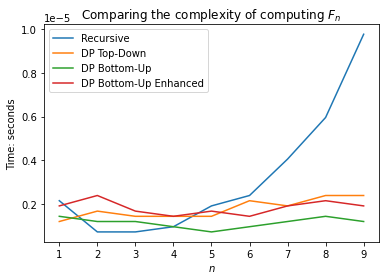

In [8]:
# the code to plot the curve

f,ax = plt.subplots()
ax.plot(range(1,SIZE),times1,label='Recursive')
ax.plot(range(1,SIZE),times2,label='DP Top-Down')
ax.plot(range(1,SIZE),times3,label='DP Bottom-Up')
ax.plot(range(1,SIZE),times4,label='DP Bottom-Up Enhanced')
ax.set_xlabel('$n$')
ax.set_ylabel('Time: seconds')
ax.set_title('Comparing the complexity of computing $F_n$')
ax.legend(loc=0);

## Student Transportation Expenses
There are diverse students coming from different places. To reach the campus, each student must go through a sequence of stations. Assume within the $i^{th}$ **station** you can pay $x_i$ to **either** get to station $(i+1)$ or $(i+2)$. At CSCI-304, we want to help our colleagues **minimize their expenses** to campus&mdash;it would be great especially after COVID-19.

**Input**: 
\begin{align*}
    \texttt{expenses}:\ &\text{array listing }\textbf{expenses}\text{ to be paid at each station to move}\\
    &\text{its values are non-negatives, and it has at least 2 values}
\end{align*}
**Output**:
\begin{align*}
    \texttt{m}:\ &\text{the expenses of transportation to the campus}\\
    & \text{Note the campus station is execluded}
\end{align*}
**Example**:<br>
Assume the below table contains the expenses per each station
<table>
    <tr>
        <th><center>Station</center></th>
        <th><center>Cost</center></th>
    </tr>
    <tr>
        <td>1</td>
        <td>1</td>
    </tr>
    <tr>
        <td>2</td>
        <td>3</td>
    </tr>
    <tr>
        <td>3</td>
        <td>6.5</td>
    </tr>
    <tr>
        <td>4</td>
        <td>2</td>
    </tr>
    <tr>
        <td>5</td>
        <td>2</td>
    </tr>
    <tr>
        <td>6</td>
        <td>8</td>
    </tr>
</table>

minimum cost, $m$, is: $8$<br/>
Explanation:
1. pay £1 to move from station $1$ to $2$
2. pay £3 to move from station $2$ to $4$
3. pay £2 to move from station $4$ to $5$
4. pay £2 to move from station $5$ to goal, two stations.

Hence, minimum total payment: $1+3+2+2 = 8$

### Solution Steps
To help us in solving the problem, we think in steps:

1. Think of a recursive solution, covered in [Module 3](https://github.com/ammarSherif/Analysis-and-Design-of-Algorithms-Tutorials/blob/main/Module%2003:%20Divide%20and%20Conquer/Module%2003:%20Divide%20and%20Conquer.ipynb) 
    1. What is the input size? Which characteristic of the input that we want to reduce through recursion?
    2. (Base Case) at which size can we solve the problem directly? and how?
    3. (Recursive Case) assume you can solve any problem whose size is above your base until $k-1$, and we want to solve at size $k$. How can we solve it?
        1. **How to divide $k$?** [Hint: think of the alternatives of the very first step of the solution]
        2. We assumed we could solve the sub-problems, so given the solution, **how to merge them?**
2. Ask yourself, is there a need for DP? Is there repeated work? If your answer is yes, do the below:
    1. convert your recursion into DP Top-Down
    2. analyse the sub-task dependencies, and figure out how to sort them based on sub-task dependency
    3. develop your bottom-up DP

### Recursive Solution

#### Input size:
We will follow the steps, so what is the input size? it is the **number of stations**, $N$, so increasing the number of stations, number of array elements, makes the problem more difficult.

#### Base case:
When can we solve the problem directly? that is **at which number of stations** can we know the solution? We might come up with different scenarios like:
- if there is a single station, $\boxed{N = 1}$, the minimum cost is to pay the charge where we are in to get to the goal `m = e[0]`
- if there are two stations left, $\boxed{N = 2}$, we must pay the charge where we are in, and we can move directly to the goal, so `m = e[0]` as well

#### Recursive case 1

1. **How to divide?**<br>We should pay attention to this. Let's focus on the alternatives. What possibilities have we got? **We must pay the charge of the station where we are in** to move. Then, we have two possibilities
    1. **move 1 station** forward: hence our size got reduced to be $N-1$, as we already one-station closer to the goal, so the new problem is how to get to the goal from station $i+1$
    2. **move 2 stations** forward: hence our size got reduced to be $N-2$, as we already two-stations closer to the goal, so the new problem is how to get to the goal from station $i+2$
2. **How to merge?**<br>We want the minimum right? Hence, we pick the minimum of the two alternatives

Hence, our equation would be
$$\boxed{MF(i) = e_i + \min\left\{MF(i+1),MF(i+2)\right\}}$$
$$MF(i): \ \text{is the $\textbf{minimum}$ cost to reach the goal from the } i^{th} \text{ station}$$

<div class="alert alert-block alert-danger">
<b>Caution:</b> as I mentioned, this recursive case is the design step, so before proceeding, I highly encourage you to <b>stop</b> here and think yourself <b>if you could get another solutions</b>. After all, the course philosophy is about thinking, so take your time coming up with your own solution. After that, you can feel free checking the below alternatives.
</div>

#### Recursive case 2
What if we changed our thinking. Let's try thinking differently:
1. **How to divide?**<br>Again we focus on the alternatives. To reach the goal, what possibilities have we got? How might we get to the goad? Well, we have two possibilities
    1. from **1 station** backward: hence our size got reduced to be $N-1$, as we already one-station closer to the start. Hence, the new problem is how to get to the station $i-1$ with minimum cost.
    2. from **2 stations** backward: hence our size got reduced to be $N-2$, as we already two-station closer to the start. Hence, the new problem is how to get to the station $i-2$ with minimum cost.
2. **How to merge?**<br>Again, we want the minimum right? Hence, we pick the minimum of the two alternative routes, including the last charge of the station

Hence, our equation would be
$$\boxed{MB(i) = \min\left\{MB(i-1) + e_{i-1},MB(i-2) + e_{i-2}\right\}}$$
$$MB(i): \ \text{is the $\textbf{minimum}$ cost to reach the } (i+1)^{th} \text{ station}$$

<div class="alert alert-block alert-danger">
<b>Caution:</b> again take your time coming up with another solution. Can you do it? After that, you can feel free checking the below one.
</div>

#### Recursive case 3
What if we changed our thinking, again. We previously thought what if we fix the goal or the start, so let's try changing everything:
1. **How to divide?**<br>Again we focus on the alternatives. Let's think of the station in the middle, what alternatives could be there in the middle of the route? Well, because **we can never pass two stations at once**, we know either the station in the middle or the one after is included in our minimum path, right?
    1. **mid station is included**: hence our size got reduced to be $N/2$, as the total min cost is the min to get to the mid and from the mid to the goal. Hence, the new problems is how to get to the station $\frac{i+j}{2}$ with minimum cost from $i$, and how to get to the station $j$ from $\frac{i+j}{2}$.
    2. **mid+1 station is included**: hence our size got reduced to be $N/2$, as the total min cost is the min to get to the mid+1 and from the mid+1 to the goal. Hence, the new problems is how to get to the station $\frac{i+j}{2}+1$ with minimum cost from $i$, and how to get to the station $j$ from $\frac{i+j}{2}+1$.
2. **How to merge?**<br>Again, we want the minimum right? Hence, we pick the minimum of the two alternative routes, including the last charge of the station

Hence, our equation would be
$$\boxed{
\begin{align*}
	m &= \left\lfloor\frac{i+j}{2}\right\rfloor\\
	M(i,j) &= \min\left\{M\left(i,m\right) + M\left(m,j\right),M\left(i,m+1\right) + M\left(m+1,j\right)\right\}\\
\end{align*}
}$$
$$M(i,j): \ \text{is the $\textbf{minimum}$ cost to reach the } (j+1)^{th} \text{ station from the } i^{th} \text{ station}$$

<div class="alert alert-block alert-warning">
<b>Author Comment:</b> I do not really know who is reading this and when, so I do not really know what do you think about this. I just cannot hold my feelings about <i>how funny and exciting</i> this is. Just think about it, who could ever think that these three different equations are the same: computing the same value which is the minimum cost. For me, this is <b>beautiful</b> as well as <b>surprising</b> if I wanted to summerize it in words, even though I am the one who came up with them, so I hope you can enjoy it yourself
</div>

#### Forward Recursive Implementation

In [9]:
def min_expense_forward(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜, start=0):
    """
    it returns the minimum costs to reach the goal station from the kth starting
    station given the costs to move from each station in <𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜>. 
    ============================================================================
    Rules: after paying the expenses of a particular station, you can either: 
        - move 1 station  forward (next station)
        - move 2 stations forward
    This implements the recursive divide-and-conquer using the forward approach
    ============================================================================
    Inputs:
    - 𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜: the  list holding the expenses to move from the kth station; the
                index k represents the kth station (stage)
                its values are non-negatives, and it has at least 2 values
    - start: the starting station we are in
    ----------------------------------------------------------------------------
    Output:
    - m: the value of the minimum costs
    ============================================================================
    Example:
    𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜 = [1,2,5,1,2,8]
    In that case: m = 6, as we should visit [0,1,3,4] with costs [1,2,1,2]
    ============================================================================
    """
    # ==========================================================================
    # write down your base case
    # --------------------------------------------------------------------------
    # 1 or 2 stations
    # ==========================================================================
    if start == len(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜)-1 or start == len(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜)-2:
        return 𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜[start]
    
    # ==========================================================================
    # Define your recursive case
    # --------------------------------------------------------------------------
    # pay the current charge and move either one or two stations forward
    # ==========================================================================
    return 𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜[start] + min(min_expense_forward(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜,start+1),
                                 min_expense_forward(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜,start+2))

In [10]:
# ==============================================================================
# Let's check some test cases
# ==============================================================================
cost = [1,3,6.5,2,2,8]
m = min_expense_forward(cost)
print(f"min({cost}): {m} [{m==8}]")
cost = [1,2,5,1,2,8]
m = min_expense_forward(cost)
print(f"min({cost}): {m} [{m==6}]")
# ==============================================================================
# Some might come up with greedy solution, so check vs this case: it should out-
# put 12. [0,2,4,6] with costs [1,5,5,1]
# ==============================================================================
cost = [1,4,5,20,5,4,1]
m = min_expense_forward(cost)
print(f"min({cost}): {m} [{m==12}]")

min([1, 3, 6.5, 2, 2, 8]): 8 [True]
min([1, 2, 5, 1, 2, 8]): 6 [True]
min([1, 4, 5, 20, 5, 4, 1]): 12 [True]


#### Backward Recursive Implementation

<div class="alert alert-block alert-info">
<b>Implementation Choice:</b> we know the first call of the backward implementation is len(expenses)-1. Given we cannot have such value as default value, as it depends on the other input, we abstract that argument by defining a wrapper function. I know this is an algorithms class, not a software engineering one, yet I love hiding unncessary arguments from users considering the perspective of good software. You might want to read about <b>software coupling and number of arguments</b> in terms of software engineering principles.
</div>

In [11]:
def min_expense_backward(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜):
    """
    it  returns the minimum costs to reach the  goal  station given the costs to 
    move from each station in <𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜>.
    ============================================================================
    Rules: after paying the expenses of a particular station, you can
    either: 
        - move 1 station  forward (next station)
        - move 2 stations forward
    This implements the divide-and-conquer using the backward approach
    ============================================================================
    Inputs:
    - 𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜: the list holding the expenses to move from the  kth station; the
                index k represents the kth station (stage)
                its values are non-negatives, and it has at least 2 values
    ----------------------------------------------------------------------------
    Output:
    - m: the value of the minimum costs
    ============================================================================
    Example:
    𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜 = [1,2,5,1,2,8]
    In that case: m = 6, as we should visit [0,1,3,4] with costs [1,2,1,2]
    ============================================================================
    """
    return min_backward(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜, len(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜))

In [12]:
def min_backward(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜, goal):
    """
    it returns the minimum costs to reach  the <goal> station from  the starting
    station given the costs to move from each station in <𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜>. 
    ============================================================================
    Rules: after paying the expenses of a particular station, you can either: 
        - move 1 station  forward (next station)
        - move 2 stations forward
    This implements the recursive divide-and-conquer using the backward approach
    ============================================================================
    Inputs:
    - 𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜: the list holding the expenses to move from  the kth station; the 
                index k represents the kth station (stage).
                its values are non-negatives, and it has at least 2 values
    - goal: index of the ending station; our goal is size of  <expenses> to  get 
                to our main goal
    ----------------------------------------------------------------------------
    Output:
    - m: the value of the minimum costs
    ============================================================================
    """
    # ==========================================================================
    # write down your base case
    # --------------------------------------------------------------------------
    # 1 or 2 stations [goal = 1 or 2]
    # ==========================================================================
    if goal == 1 or goal == 2:
        return 𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜[0]
    
    # ==========================================================================
    # More than two stations goal >= 3: recursive case
    # --------------------------------------------------------------------------
    # either you got here from (goal-1) or (goal-2)
    # ==========================================================================
    return min(min_backward(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜, goal-1) + 𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜[goal-1],
               min_backward(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜, goal-2) + 𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜[goal-2])

In [13]:
# ==============================================================================
# Let's check some test cases
# ==============================================================================
cost = [1,3,6.5,2,2,8]
m = min_expense_backward(cost)
print(f"min({cost}): {m} [{m==8}]")
cost = [1,2,5,1,2,8]
m = min_expense_backward(cost)
print(f"min({cost}): {m} [{m==6}]")
# ==============================================================================
# Some might come up with greedy solution, so check vs this case: it should out-
# put 12. [0,2,4,6] with costs [1,5,5,1]
# ==============================================================================
cost = [1,4,5,20,5,4,1]
m = min_expense_backward(cost)
print(f"min({cost}): {m} [{m==12}]")

min([1, 3, 6.5, 2, 2, 8]): 8 [True]
min([1, 2, 5, 1, 2, 8]): 6 [True]
min([1, 4, 5, 20, 5, 4, 1]): 12 [True]


#### Mid Recursive Implementation

In [14]:
def min_expense_mid(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜):
    """
    it  returns the minimum costs to reach the  goal  station given the costs to 
    move from each station in <𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜>.
    ============================================================================
    Rules: after paying the expenses of a particular station, you can
    either: 
        - move 1 station  forward (next station)
        - move 2 stations forward
    This implements the divide-and-conquer using the mid approach
    ============================================================================
    Inputs:
    - 𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜: the list holding the expenses to move from the  kth station; the
                index k represents the kth station (stage)
                its values are non-negatives, and it has at least 2 values
    ----------------------------------------------------------------------------
    Output:
    - m: the value of the minimum costs
    ============================================================================
    Example:
    𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜 = [1,2,5,1,2,8]
    In that case: m = 6, as we should visit [0,1,3,4] with costs [1,2,1,2]
    ============================================================================
    """
    return min_mid(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜, 0, len(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜))

In [15]:
def min_mid(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜, start, goal):
    """
    it returns the minimum costs to reach  the <goal>  station from  the <start>
    station given the costs to move from each station in <𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜>. 
    ============================================================================
    Rules: after paying the expenses of a particular station, you can either: 
        - move 1 station  forward (next station)
        - move 2 stations forward
    This implements the recursive divide-and-conquer using the mid approach
    ============================================================================
    Inputs:
    - 𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜: the list holding the expenses to move from  the kth station; the 
                index k represents the kth station (stage).
                its values are non-negatives, and it has at least 2 values
    - start: the starting station we are in
    - goal: index of the ending station; our goal is size of  <expenses> to  get 
                to our main goal
    ----------------------------------------------------------------------------
    Output:
    - m: the value of the minimum costs
    ============================================================================
    """
    # ==========================================================================
    # write down your base case
    # --------------------------------------------------------------------------
    # 1 or 2 stations
    # ==========================================================================
    if (goal-start) == 1 or (goal-start) == 2:
        return 𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜[start]
    
    # ==========================================================================
    # More than two stations >= 3: recursive case
    # --------------------------------------------------------------------------
    # either you can pass through mid or mid+1 stations
    # ==========================================================================
    mid = (start+goal)//2
    
    return min(min_mid(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜,start,mid) + min_mid(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜,mid,goal),
               min_mid(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜,start,mid+1) + min_mid(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜,mid+1,goal))

In [16]:
# ==============================================================================
# Let's check some test cases
# ==============================================================================
cost = [1,3,6.5,2,2,8]
m = min_expense_mid(cost)
print(f"min({cost}): {m} [{m==8}]")
cost = [1,2,5,1,2,8]
m = min_expense_mid(cost)
print(f"min({cost}): {m} [{m==6}]")
# ==============================================================================
# Some might come up with greedy solution, so check vs this case: it should out-
# put 12. [0,2,4,6] with costs [1,5,5,1]
# ==============================================================================
cost = [1,4,5,20,5,4,1]
m = min_expense_mid(cost)
print(f"min({cost}): {m} [{m==12}]")

min([1, 3, 6.5, 2, 2, 8]): 8 [True]
min([1, 2, 5, 1, 2, 8]): 6 [True]
min([1, 4, 5, 20, 5, 4, 1]): 12 [True]


#### Recursive Theoretical Analysis
1. Both forward and Backward:
\begin{align*}
    T(n) &= T(n-1) + T(n-2) + \Theta(1)\\
    &= \Omega(2^{n/2})
\end{align*}
2. Mid-point recrusive:
\begin{align*}
    T(n) &= 4T(n/2) + \Theta(1)\\
    &= \boxed{\Theta(n^{2})}
\end{align*}

<div class="alert alert-block alert-info">
<b>Performance Enhancement:</b> have you noticed it? The algorithm performance got ehanced only with designing recursive differently like in mid-point case rather than the first two.
</div>

#### Recursive Empirical Analysis

In [17]:
# ==============================================================================
# We will empirically evaluate the 3 procedures
# ==============================================================================
data = [1]
# ------------------------------------------------------------------------------
# List of 3 lists: we use each small sublist to record the times  of an approach
# ------------------------------------------------------------------------------
times = [[] for y in range(3)]
# ------------------------------------------------------------------------------
# Maximum number of stations
# ------------------------------------------------------------------------------
MAX_SIZE = 15
same_flag = True
for i in range(2,MAX_SIZE+1):
    data.append(i)
    start_time = time.time()
    v1 = min_expense_forward(data)
    times[0].append(time.time() - start_time)
    start_time = time.time()
    v2 = min_expense_backward(data)
    times[1].append(time.time() - start_time)
    start_time = time.time()
    v3 = min_expense_mid(data)
    times[2].append(time.time() - start_time)
    
    same_flag = same_flag and (v1==v2==v3)
# ==============================================================================
# Make sure all the results are the same
# ==============================================================================
print(f"Are all the results the same? {same_flag}")

Are all the results the same? True


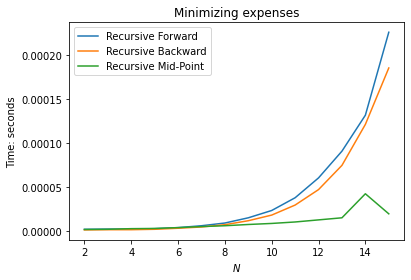

In [18]:
# ==============================================================================
# Let's plot the results to see if really the mid-point is better
# ==============================================================================
f,ax = plt.subplots()
ax.plot(range(2,MAX_SIZE+1),times[0],label='Recursive Forward')
ax.plot(range(2,MAX_SIZE+1),times[1],label='Recursive Backward')
ax.plot(range(2,MAX_SIZE+1),times[2],label='Recursive Mid-Point')
ax.set_xlabel('$N$')
ax.set_ylabel('Time: seconds')
ax.set_title('Minimizing expenses')
ax.legend(loc=0);

### Dynamic Programming Solution

Having completed the first step, we can proceed to Dynamic Programming. I will mainly work on a single approach, but you can do the same for the others. Therefore, let's work on the forward approach:
$$\boxed{MF(i) = e_i + \min\left(MF(i+1),MF(i+2)\right)}$$

Before doing anything, we must first make sure that there is repeated work done. We can verify this analytically:
1. $MF(0) \ \text{ needs }\ MF(1) \land MF(2)$
2. $MF(1) \ \text{ needs }\ MF(2) \land MF(3)$

Hence, we can see that $MF(2)$ will be computed twice. Therefore, there is indeed **repeated work**. We can even verify this empirically, by adjusting our function and calling it like below:

In [19]:
def min_expense_f_rw(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜, start=0):
    """
    it returns the minimum costs to reach the goal station from the kth starting
    station given the costs to move from each station in <𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜>. 
    ============================================================================
    Rules: after paying the expenses of a particular station, you can either: 
        - move 1 station  forward (next station)
        - move 2 stations forward
    This implements the recursive divide-and-conquer using the forward approach
    ============================================================================
    Inputs:
    - 𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜: the  list holding the expenses to move from the kth station; the
                index k represents the kth station (stage)
                its values are non-negatives, and it has at least 2 values
    - start: the starting station we are in
    ----------------------------------------------------------------------------
    Output:
    - m: the value of the minimum costs
    ============================================================================
    Example:
    𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜 = [1,2,5,1,2,8]
    In that case: m = 6, as we should visit [0,1,3,4] with costs [1,2,1,2]
    ============================================================================
    """
    # ==========================================================================
    # Let's see if the start value ever duplicates
    # ==========================================================================
    print(f"sub-problem: {start}")
    # ==========================================================================
    # write down your base case
    # --------------------------------------------------------------------------
    # 1 or 2 stations
    # ==========================================================================
    if start == len(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜)-1 or start == len(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜)-2:
        return 𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜[start]
    
    # ==========================================================================
    # Define your recursive case
    # --------------------------------------------------------------------------
    # pay the current charge and move either one or two stations forward
    # ==========================================================================
    return 𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜[start] + min(min_expense_f_rw(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜,start+1),
                                 min_expense_f_rw(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜,start+2))

In [20]:
# ==============================================================================
# Let's see if the start value ever duplicates
# ==============================================================================
cost = [1,3,6.5,2,2,8]
m = min_expense_f_rw(cost)
# ==============================================================================
# As you can see below, the sub-problems indeed duplicate.
# ==============================================================================

sub-problem: 0
sub-problem: 1
sub-problem: 2
sub-problem: 3
sub-problem: 4
sub-problem: 5
sub-problem: 4
sub-problem: 3
sub-problem: 4
sub-problem: 5
sub-problem: 2
sub-problem: 3
sub-problem: 4
sub-problem: 5
sub-problem: 4


#### Top-Down

We just follow the previously mentioned [steps to convert the recursion into top-down](#Steps-for-Top-Down-DP-from-Recursion).

In [21]:
def min_expense_f_td(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜, start=0, memo=None):
    """
    it returns the minimum costs to reach the goal station from the kth starting
    station given the costs to move from each station in <𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜>. 
    ============================================================================
    Rules: after paying the expenses of a particular station, you can either: 
        - move 1 station  forward (next station)
        - move 2 stations forward
    This implements the Top-Down DP using the forward approach
    ============================================================================
    Inputs:
    - 𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜: the  list holding the expenses to move from the kth station; the
                index k represents the kth station (stage)
                its values are non-negatives, and it has at least 2 values
    -    start: the starting station we are in
    -     memo: holds the solutions to the already solved sub-problems
    ----------------------------------------------------------------------------
    Output:
    - m: the value of the minimum costs
    ============================================================================
    Example:
    𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜 = [1,2,5,1,2,8]
    In that case: m = 6, as we should visit [0,1,3,4] with costs [1,2,1,2]
    ============================================================================
    """
    # ==========================================================================
    # If the memo is not initialized, initialize it first to be a dictionary
    # ==========================================================================
    if memo is None:
        memo = {}
    # ==========================================================================
    # Step 2: check whether the problem is already solved.
    # This sub-problem has already been solved; return the solution
    # ==========================================================================
    if start in memo:
        return memo[start]
    
    # ==========================================================================
    # Otherwise, solve the sub-problem and store it.
    # --------------------------------------------------------------------------
    # We simply  store the  value returned  in  memo[start]  before every return
    # statement
    # ==========================================================================
    
    # ==========================================================================
    # write down your base case
    # --------------------------------------------------------------------------
    # 1 or 2 stations
    # ==========================================================================
    if start == len(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜)-1 or start == len(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜)-2:
        memo[start] = 𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜[start]
        return 𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜[start]
    
    # ==========================================================================
    # Define your recursive case
    # --------------------------------------------------------------------------
    # pay the current charge and move either one or two stations forward
    # ==========================================================================
    memo[start] = 𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜[start] + min(min_expense_f_td(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜,start+1,memo),
                                        min_expense_f_td(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜,start+2,memo))
    return memo[start]

In [22]:
# ==============================================================================
# Let's check some test cases
# ==============================================================================
cost = [1,3,6.5,2,2,8]
m = min_expense_f_td(cost)
print(f"min({cost}): {m} [{m==8}]")
cost = [1,2,5,1,2,8]
m = min_expense_f_td(cost)
print(f"min({cost}): {m} [{m==6}]")
# ==============================================================================
# Some might come up with greedy solution, so check vs this case: it should out-
# put 12. [0,2,4,6] with costs [1,5,5,1]
# ==============================================================================
cost = [1,4,5,20,5,4,1]
m = min_expense_f_td(cost)
print(f"min({cost}): {m} [{m==12}]")

min([1, 3, 6.5, 2, 2, 8]): 8 [True]
min([1, 2, 5, 1, 2, 8]): 6 [True]
min([1, 4, 5, 20, 5, 4, 1]): 12 [True]


#### Bottom-Up

We first investigate the sub-task dependencies empirically as below:

In [23]:
def min_expense_f_dependencies(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜, start=0, memo=None):
    """
    it returns the minimum costs to reach the goal station from the kth starting
    station given the costs to move from each station in <𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜>.  It is used
    to check task dependencies as well.
    ============================================================================
    Rules: after paying the expenses of a particular station, you can either: 
        - move 1 station  forward (next station)
        - move 2 stations forward
    This implements the Top-Down DP using the forward approach
    ============================================================================
    Inputs:
    - 𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜: the  list holding the expenses to move from the kth station; the
                index k represents the kth station (stage)
                its values are non-negatives, and it has at least 2 values
    -    start: the starting station we are in
    -     memo: holds the solutions to the already solved sub-problems
    ----------------------------------------------------------------------------
    Output:
    - m: the value of the minimum costs
    ============================================================================
    Example:
    𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜 = [1,2,5,1,2,8]
    In that case: m = 6, as we should visit [0,1,3,4] with costs [1,2,1,2]
    ============================================================================
    """
    # --------------------------------------------------------------------------
    # If the memo is not initialized, initialize it first to be a dictionary
    # --------------------------------------------------------------------------
    if memo is None:
        memo = {}
    # --------------------------------------------------------------------------
    # Step 2: check whether the problem is already solved.
    # This sub-problem has already been solved; return the solution
    # --------------------------------------------------------------------------
    if start in memo:
        return memo[start]
    
    # ==========================================================================
    # Print the sub-problem id
    # ==========================================================================
    print(f"Try solving task: {start}")
    
    # --------------------------------------------------------------------------
    # Otherwise, solve the sub-problem and store it.
    # --------------------------------------------------------------------------
    # We simply  store the  value returned  in  memo[start]  before every return
    # statement
    # --------------------------------------------------------------------------
    
    # --------------------------------------------------------------------------
    # write down your base case
    # --------------------------------------------------------------------------
    # 1 or 2 stations
    # --------------------------------------------------------------------------
    if start == len(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜)-1 or start == len(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜)-2:
        memo[start] = 𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜[start]
        return 𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜[start]
    
    # --------------------------------------------------------------------------
    # Define your recursive case
    # --------------------------------------------------------------------------
    # pay the current charge and move either one or two stations forward
    # --------------------------------------------------------------------------
    v = min(min_expense_f_dependencies(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜,start+1,memo),
            min_expense_f_dependencies(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜,start+2,memo))
    memo[start] = 𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜[start] + v
    return memo[start]

In [24]:
# ==============================================================================
# Let's check the dependencies
# ==============================================================================
cost = [1,3,6.5,2,2,8]
print(f"With len = {len(cost)}")
m = min_expense_f_dependencies(cost)

With len = 6
Try solving task: 0
Try solving task: 1
Try solving task: 2
Try solving task: 3
Try solving task: 4
Try solving task: 5


As we can see, we simply loop from `len-1` to `0`. This can easily be checked theoretically, just expanding the recursion tree

In [25]:
def min_expense_f_bu(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜):
    """
    it returns the minimum costs to reach the goal station from the kth starting
    station given the costs to move from each station in <𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜>. 
    ============================================================================
    Rules: after paying the expenses of a particular station, you can either: 
        - move 1 station  forward (next station)
        - move 2 stations forward
    This implements the Bottom-Up DP using the forward approach
    ============================================================================
    Inputs:
    - 𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜: the  list holding the expenses to move from the kth station; the
                index k represents the kth station (stage)
                its values are non-negatives, and it has at least 2 values
    ----------------------------------------------------------------------------
    Output:
    - m: the value of the minimum costs
    ============================================================================
    Example:
    𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜 = [1,2,5,1,2,8]
    In that case: m = 6, as we should visit [0,1,3,4] with costs [1,2,1,2]
    ============================================================================
    """
    # ==========================================================================
    # initialize a memo
    # ==========================================================================
    memo = {}
    # ==========================================================================
    # write down your base case
    # --------------------------------------------------------------------------
    # 1 or 2 stations
    # ==========================================================================
    memo[len(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜)-1] = 𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜[len(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜)-1]
    memo[len(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜)-2] = 𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜[len(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜)-2]
    
    # ==========================================================================
    # Loop over the sub-tasks in order
    # ==========================================================================
    for start in range(len(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜)-3,-1,-1):
        memo[start] = 𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜[start] + min(memo[start+1],memo[start+2])
    
    # ==========================================================================
    # return the value we would like to return memo[0]
    # ==========================================================================
    return memo[0]

In [26]:
# ==============================================================================
# Let's check some test cases
# ==============================================================================
cost = [1,3,6.5,2,2,8]
m = min_expense_f_bu(cost)
print(f"min({cost}): {m} [{m==8}]")
cost = [1,2,5,1,2,8]
m = min_expense_f_bu(cost)
print(f"min({cost}): {m} [{m==6}]")
# ==============================================================================
# Some might come up with greedy solution, so check vs this case: it should out-
# put 12. [0,2,4,6] with costs [1,5,5,1]
# ==============================================================================
cost = [1,4,5,20,5,4,1]
m = min_expense_f_bu(cost)
print(f"min({cost}): {m} [{m==12}]")

min([1, 3, 6.5, 2, 2, 8]): 8 [True]
min([1, 2, 5, 1, 2, 8]): 6 [True]
min([1, 4, 5, 20, 5, 4, 1]): 12 [True]


#### Theoretical Analysis

**Time complexity**:
\begin{align*}
    T_{TDown}(n) &= \boxed{\Theta\big( \text{#distinct sub-problems}\big) \times \Theta\big(\text{work per each sub-problem, single call, without recursion} \big)}\\
    &= \Theta(n) \times \Theta(1)\\
    &= \boxed{\Theta(n)}\\
    T_{BUp}(n) &= \underbrace{\boxed{\Theta(n)}}_{\text{A single loop}}
\end{align*}

**Space complexity** in Dynamic Programming is $$\Theta\big(\text{#distinct sub-problems}\big) = \Theta(n)$$

#### Enhanced Bottom-Up

Again, with Bottom-Up, we notice we only need two variables instead of $n$; then, our enhanced algorithm with a space complexity of $\Theta(1)$. 

In [27]:
def min_expense_f_bu_en(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜):
    """
    it returns the minimum costs to reach the goal station from the kth starting
    station given the costs to move from each station in <𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜>. 
    ============================================================================
    Rules: after paying the expenses of a particular station, you can either: 
        - move 1 station  forward (next station)
        - move 2 stations forward
    This implements the Bottom-Up DP using the forward approach, but enhanced
    ============================================================================
    Inputs:
    - 𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜: the  list holding the expenses to move from the kth station; the
                index k represents the kth station (stage)
                its values are non-negatives, and it has at least 2 values
    ----------------------------------------------------------------------------
    Output:
    - m: the value of the minimum costs
    ============================================================================
    Example:
    𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜 = [1,2,5,1,2,8]
    In that case: m = 6, as we should visit [0,1,3,4] with costs [1,2,1,2]
    ============================================================================
    """
    # ==========================================================================
    # State some easy cases to operate reasonably 
    # ==========================================================================
    if len(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜) == 1 or len(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜) == 2:
        return 𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜[0]
    # ==========================================================================
    # write down your base case
    # --------------------------------------------------------------------------
    # 1 or 2 stations
    # ==========================================================================
    previous_value = 𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜[len(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜)-1]
    current_value = 𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜[len(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜)-2]
    
    # ==========================================================================
    # Loop over the sub-tasks in order
    # ==========================================================================
    for start in range(len(𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜)-3,-1,-1):
        min_val = min(previous_value,current_value)
        current_value,previous_value = 𝚎𝚡𝚙𝚎𝚗𝚜𝚎𝚜[start]+min_val, current_value
        
    
    # ==========================================================================
    # return the value we would like to return current_value
    # ==========================================================================
    return current_value

In [28]:
# ==============================================================================
# Let's check some test cases
# ==============================================================================
cost = [1,3,6.5,2,2,8]
m = min_expense_f_bu_en(cost)
print(f"min({cost}): {m} [{m==8}]")
cost = [1,2,5,1,2,8]
m = min_expense_f_bu_en(cost)
print(f"min({cost}): {m} [{m==6}]")
# ==============================================================================
# Some might come up with greedy solution, so check vs this case: it should out-
# put 12. [0,2,4,6] with costs [1,5,5,1]
# ==============================================================================
cost = [1,4,5,20,5,4,1]
m = min_expense_f_bu_en(cost)
print(f"min({cost}): {m} [{m==12}]")

min([1, 3, 6.5, 2, 2, 8]): 8 [True]
min([1, 2, 5, 1, 2, 8]): 6 [True]
min([1, 4, 5, 20, 5, 4, 1]): 12 [True]


### Empirical Analysis
We start with visualizing the complexity of our different approaches to solve the problem.

In [29]:
# ==============================================================================
# We will empirically evaluate the 6 procedures
# ==============================================================================
data = [1]
# ------------------------------------------------------------------------------
# List of 6 lists: we use each small sublist to record the times  of an approach
# ------------------------------------------------------------------------------
times = [[] for y in range(6)]
# ------------------------------------------------------------------------------
# Maximum number of stations
# ------------------------------------------------------------------------------
MAX_SIZE = 15
same_flag = True
for i in range(2,MAX_SIZE+1):
    data.append(i)
    start_time = time.time()
    v1 = min_expense_forward(data)
    times[0].append(time.time() - start_time)
    start_time = time.time()
    v2 = min_expense_backward(data)
    times[1].append(time.time() - start_time)
    start_time = time.time()
    v3 = min_expense_mid(data)
    times[2].append(time.time() - start_time)
    start_time = time.time()
    v4 = min_expense_f_td(data)
    times[3].append(time.time() - start_time)
    start_time = time.time()
    v5 = min_expense_f_bu(data)
    times[4].append(time.time() - start_time)
    start_time = time.time()
    v6 = min_expense_f_bu_en(data)
    times[5].append(time.time() - start_time)
    
    same_flag = same_flag and (v1==v2==v3==v4==v5==v6)
# ==============================================================================
# Make sure all the results are the same
# ==============================================================================
print(f"Are all the results the same? {same_flag}")

Are all the results the same? True


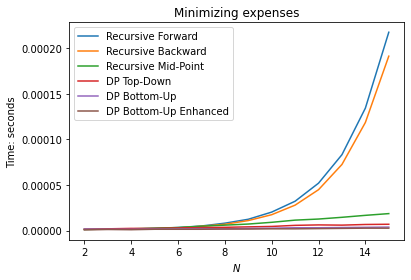

In [30]:
# ==============================================================================
# Compare all the approaches
# ==============================================================================
f,ax = plt.subplots()
ax.plot(range(2,MAX_SIZE+1),times[0],label='Recursive Forward')
ax.plot(range(2,MAX_SIZE+1),times[1],label='Recursive Backward')
ax.plot(range(2,MAX_SIZE+1),times[2],label='Recursive Mid-Point')
ax.plot(range(2,MAX_SIZE+1),times[3],label='DP Top-Down')
ax.plot(range(2,MAX_SIZE+1),times[4],label='DP Bottom-Up')
ax.plot(range(2,MAX_SIZE+1),times[5],label='DP Bottom-Up Enhanced')
ax.set_xlabel('$N$')
ax.set_ylabel('Time: seconds')
ax.set_title('Minimizing expenses')
ax.legend(loc=0);

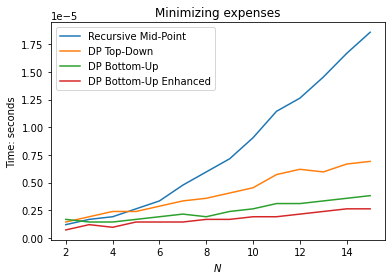

In [31]:
# ==============================================================================
# Compare the mid-point recursive along with the other DP approaches
# ==============================================================================
f,ax = plt.subplots()
ax.plot(range(2,MAX_SIZE+1),times[2],label='Recursive Mid-Point')
ax.plot(range(2,MAX_SIZE+1),times[3],label='DP Top-Down')
ax.plot(range(2,MAX_SIZE+1),times[4],label='DP Bottom-Up')
ax.plot(range(2,MAX_SIZE+1),times[5],label='DP Bottom-Up Enhanced')
ax.set_xlabel('$N$')
ax.set_ylabel('Time: seconds')
ax.set_title('Minimizing expenses')
ax.legend(loc=0);

<div class="alert alert-block alert-info">
<b>Task:</b> you might want to check your knowledge trying to see if the other two approaches, backward and mid-point, need DP. If yes, modify them to Dynamic Programming.
</div>

## References and Further Readings

- Introduction to Algorithms 3rd Edition [CLRS]
    - Ch 15 for Dynamic Programming